# <p style="padding:10px;background-color:#000000;margin:0;color:white;font-family:newtimeroman;font-size:135%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Despresso </p>
<p style="text-align:center; ">
<img src="https://img.lovepik.com/photo/40186/6783.jpg_wh860.jpg" style='width: 600px; height: 300px;'>
</p>




<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">IMPORTING LIBRARIES</p>

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time 

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# string functions
import string


# NLTK
from nltk import word_tokenize, bigrams
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# ML


# other stuff
from collections import Counter

In [2]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

<a id="2"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ABOUT DATASET</p>

- This dataset contains information  in excel format which comprises around 6500 data from social media, Facebook comments, posts, etc.
-  All the people selected for data annotation are very well in English Language and are undergraduate students


- There are two columns in this dataset. Text and labels are the two types
- Normal and anxiety/depression text is present in the text columns, and the label column indicates whether the corresponding text denotes anxiety or depression.



In [3]:
df = pd.read_excel('Depression&Anxiety.xlsx')
df.columns

Index(['text', 'label', 'Age', 'Gender', 'Age Group'], dtype='object')

<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>


In [4]:
print(f"Shape of The Student  Dataset : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})


Shape of The Student  Dataset : (6982, 5)

Glimpse of The Dataset :


,text,label,Age,Gender,Age Group
0,"Thank you so much for those who want to follow and be friends with meðŸ™ . Those who want to follow me please, I'll be happy to follow you guys too.. Greetings friendship without limits ™ —ðŸ˜Š",0.000000,15,Female,Teen Age
1,What time is it now?,0.000000,15,Female,Teen Age
2,What time is it today?,0.000000,15,Female,Teen Age
3,Shame brother.,0.000000,15,Female,Teen Age
4,Eid is coming baby,0.000000,15,Female,Teen Age


In [5]:
df.tail().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,text,label,Age,Gender,Age Group
6977,"How many days have you been feeling restless at night and in the afternoon your mind is empty, why?",1.000000,16,Female,Teen Age
6978,"From now on, it's not really good, being restless is tired by nature",1.000000,16,Female,Teen Age
6979,"I haven't slept yet, and now my head hurts so bad. I'm sleepy, but I can't sleep, I've tried to brake but I'm restless",1.000000,16,Female,Teen Age
6980,lw,nan,16,Male,Teen Age
6981,™†ðŸ rwoq,nan,16,Male,Teen Age


In [6]:
print(f"Informations About Dataset :\n")
print(df.info())

Informations About Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       6972 non-null   object 
 1   label      6980 non-null   float64
 2   Age        6982 non-null   int64  
 3   Gender     6982 non-null   object 
 4   Age Group  6982 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 272.9+ KB
None


In [7]:
print(f"Summary of The  Dataset :")
df.describe().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

Summary of The  Dataset :


,count,mean,std,min,25%,50%,75%,max
label,6980.000000,0.105014,0.306594,0.000000,0.000000,0.000000,0.000000,1.000000
Age,6982.000000,15.295904,1.032536,13.000000,14.000000,15.000000,16.000000,17.000000


In [8]:
df.describe(include=object).T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

,count,unique,top,freq
text,6972,6873,ni-ki best boy,11
Gender,6982,2,Male,3899
Age Group,6982,2,Teen Age,5033


In [9]:
print("Null Values of Dataset :")
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

Null Values of Dataset :


,text,label,Age,Gender,Age Group
0,10,2,0,0,0


In [10]:
print("After Dropping, Null Values of  Dataset :")
df.dropna(axis = 0, inplace = True)
df.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

After Dropping, Null Values of  Dataset :


,text,label,Age,Gender,Age Group
0,0,0,0,0,0


In [11]:
dup_df = df[df.duplicated()].shape[0]
print(f"There are {dup_df} duplicate entries among {df.shape[0]} entries in  dataset.")

There are 33 duplicate entries among 6970 entries in  dataset.


In [12]:
df = df.sample(frac = 1)

In [13]:
df['label'].value_counts().to_frame().T.style.set_properties(**{"background-color": "#E5E4E2","color":"black","border": "1.5px  solid black"})

,0.000000,1.000000
label,6240,730


<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Visualization</p>

C:\Users\shish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Freq')

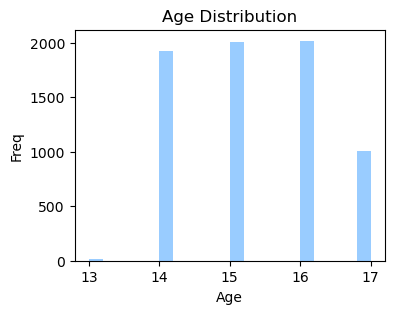

In [14]:
fig,ax = plt.subplots(figsize=(4,3))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#0080ff')
plt.title('Age Distribution')
plt.ylabel('Freq')


Glimpse of The Gender of Students :


C:\Users\shish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender')

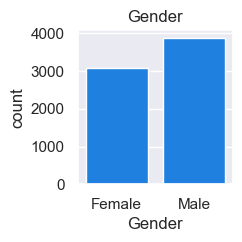

In [64]:
print(f"\nGlimpse of The Gender of Students :")
sns.countplot(df['Gender'], color='#0080ff')
fig = plt.gcf()
fig.set_size_inches(2,2)
plt.title('Gender')


Glimpse of The Age Category of Students :


C:\Users\shish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\shish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age Category Of Students')

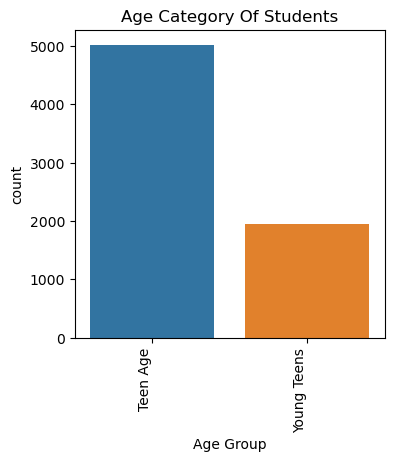

In [16]:
print(f"\nGlimpse of The Age Category of Students :")
sns.countplot(df['Age Group'])
sns.countplot(df['Age Group']).set_xticklabels(sns.countplot(df['Age Group']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.title('Age Category Of Students')


Glimpse of The Age of Students :


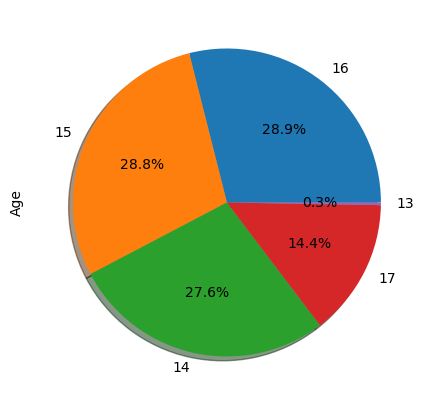

In [17]:
print(f"\nGlimpse of The Age of Students :")
df['Age'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(5,5))
plt.show()


Glimpse of Relation Between Label and Age Group of Students :


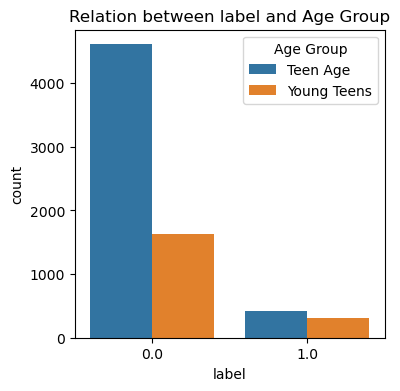

In [18]:
print(f"\nGlimpse of Relation Between Label and Age Group of Students :")
plt.figure(figsize=(4,4))
sns.countplot(x='label',hue='Age Group',data=df)
plt.title('Relation between label and Age Group')
plt.show()


Glimpse of Relation Between Gender and Age  of Students :


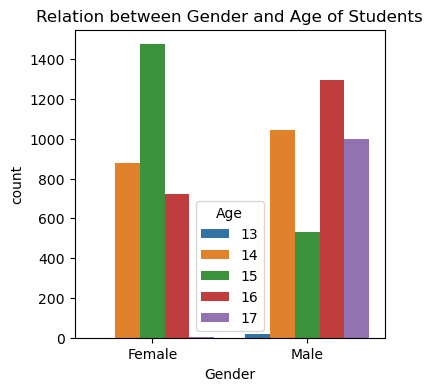

In [19]:
print(f"\nGlimpse of Relation Between Gender and Age  of Students :")
plt.figure(figsize=(4,4))
sns.countplot(x='Gender',hue='Age',data=df)
plt.title('Relation between Gender and Age of Students')
plt.show()

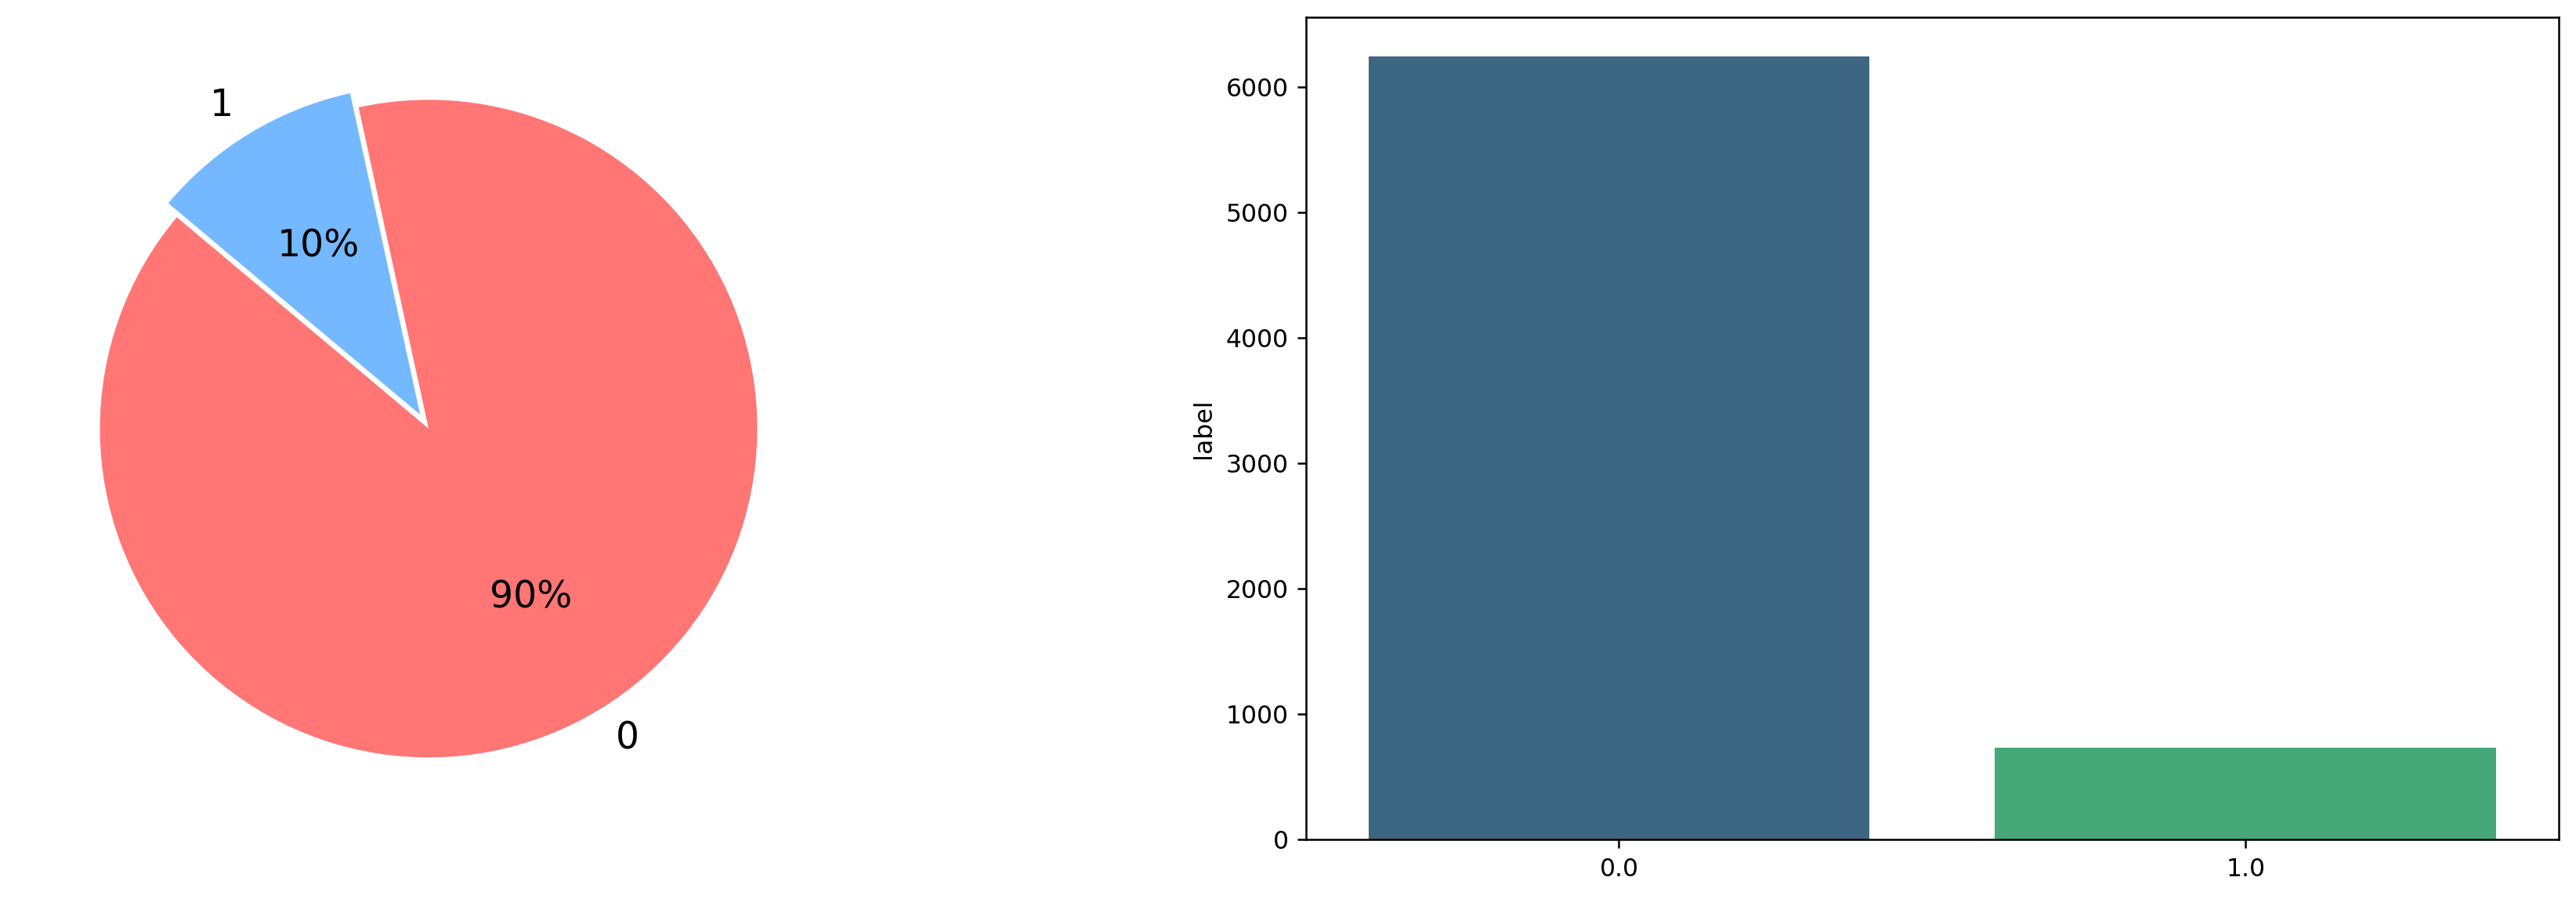

In [20]:
labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = df['label'].unique(), y = df['label'].value_counts(), palette= 'viridis')

plt.show()

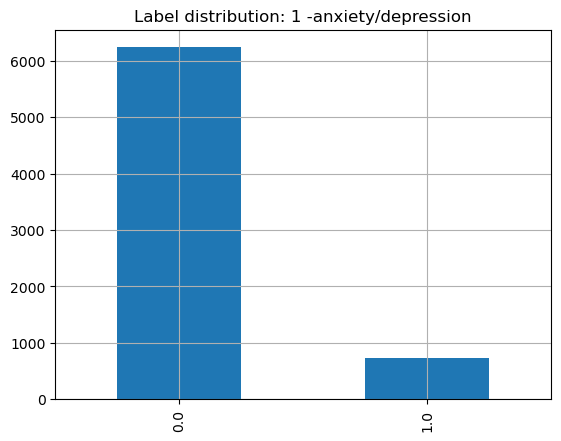

In [21]:
df.label.value_counts().plot(kind='bar')
plt.title('Label distribution: 1 -anxiety/depression')
plt.grid()
plt.show()

In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud

<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing Text</p>


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup

In [25]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

 ## Contraction Mapping

In [28]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [29]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [30]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [31]:
print(df)

                                                   text  label  Age  Gender  \
1149       Guys can you check my pin '‰ðŸ »ðŸ'ˆðŸ »ðŸ¥º    0.0   15  Female   
5947                           Only two days of fasting    0.0   16    Male   
4037                                         lazy to go    0.0   14    Male   
1208  Good leader showing the good behavior, now I s...    0.0   15  Female   
1198                           Break or not, edi break.    0.0   15  Female   
...                                                 ...    ...  ...     ...   
6949            sleep really restless duh don't like it    1.0   13    Male   
5514               861b2d82-018e-4452-bdb5-fbab46b38feb    0.0   16    Male   
3822                           AAAAA GAMAU SHOWING HIKS    0.0   14    Male   
4907  If you read that people have experience at AZ ...    0.0   17    Male   
3084  /beauty/ does anyone use nvtrishe serum or not...    0.0   15    Male   

        Age Group  
1149     Teen Age  
5947     Te

In [32]:
df['cleaned'] = df["text"].apply(text_cleaner)

C:\Users\shish\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [33]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


<a id="4"></a>
# <p style="padding:10px;background-color:black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Visualizing WordCloud</p>



Glimpse of Student Text WordCloud :


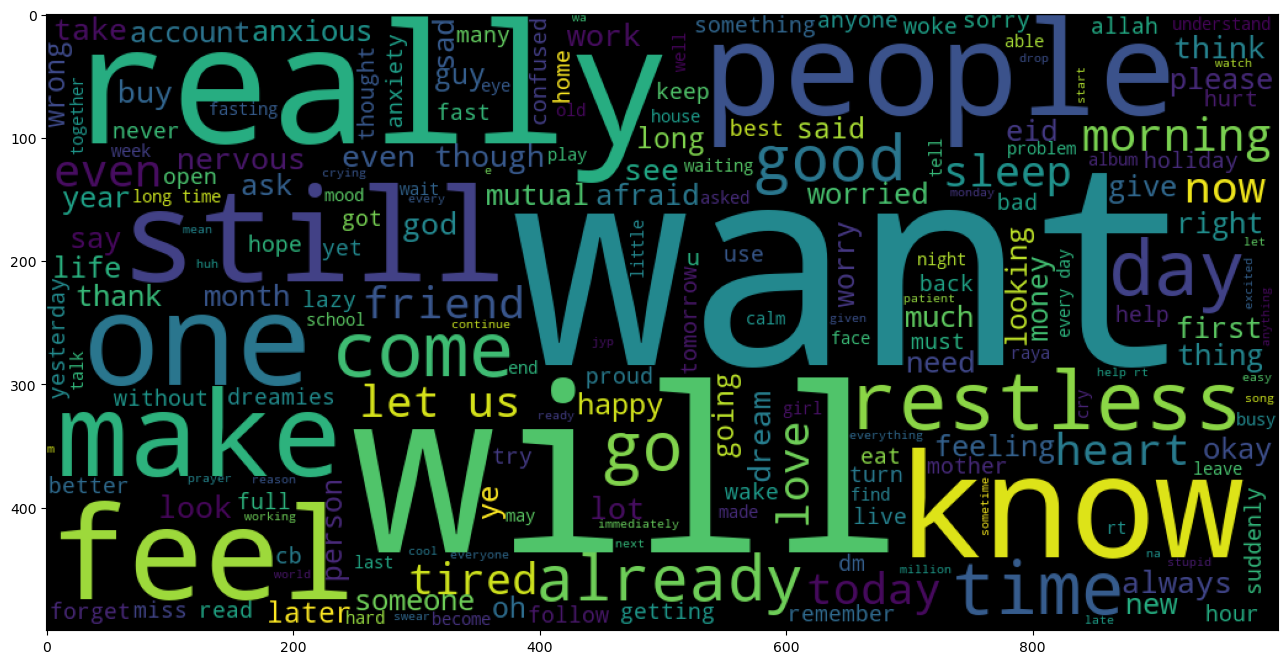

In [34]:
print(f"\nGlimpse of Student Text WordCloud :")
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='black',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [36]:
text_0 = " ".join(xx for xx in df.text[df.label==0])
text_1 = " ".join(xx for xx in df.text[df.label==1])


Glimpse of Normal Text WordCloud :


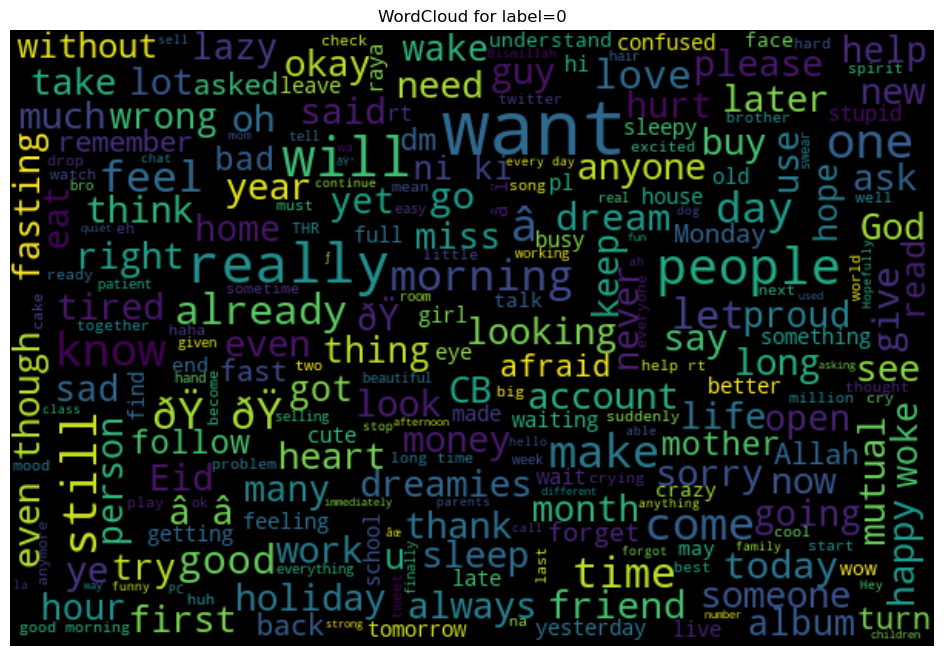

In [37]:
print(f"\nGlimpse of Normal Text WordCloud :")
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_0)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=0')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Glimpse of Depressed Text WordCloud :


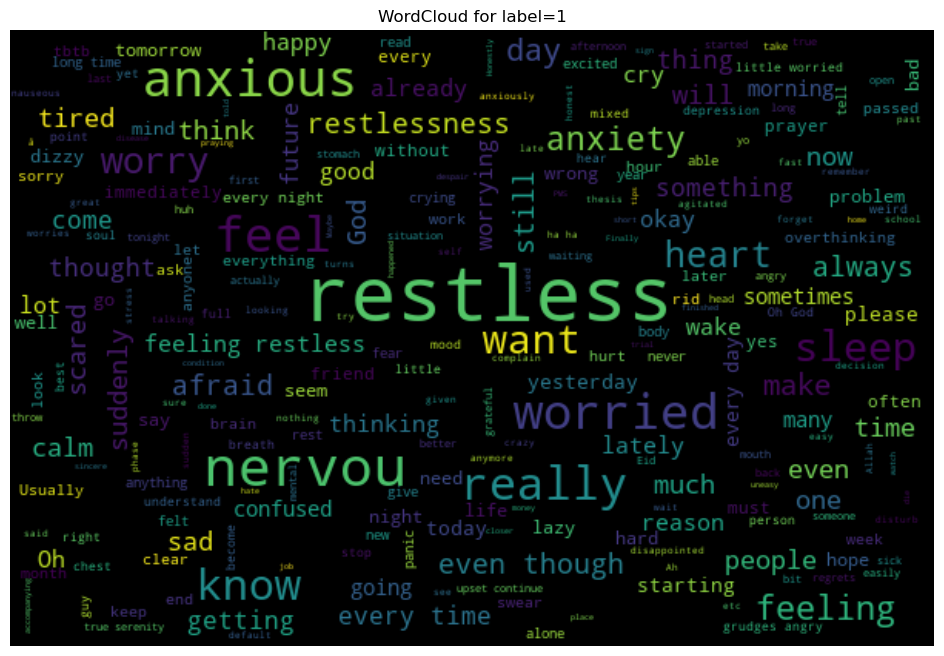

In [38]:
print(f"\nGlimpse of Depressed Text WordCloud :")
wordcloud = WordCloud( max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_1)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=1')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

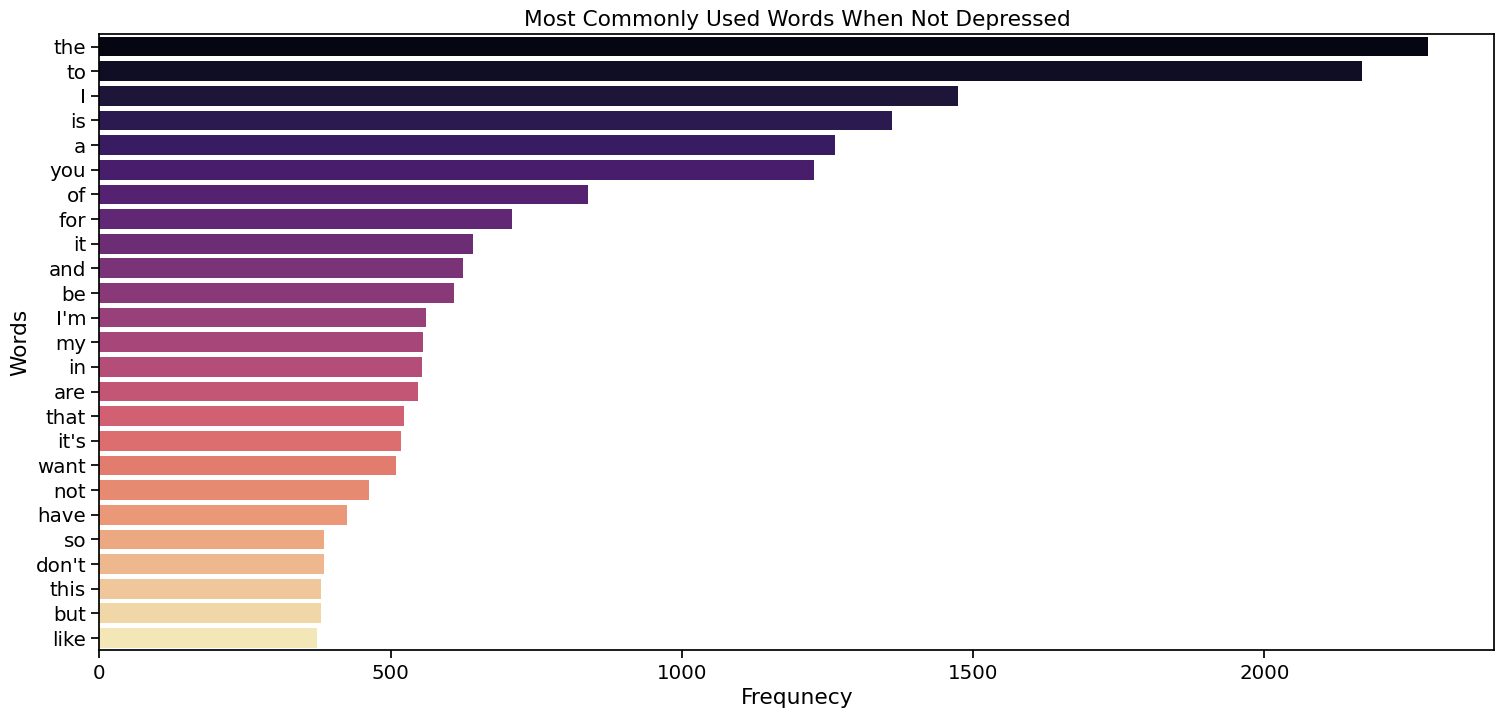

In [37]:
all_nodep_words = []
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

dk = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y=dk['Word'], x=dk['Frequency'], palette='magma')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

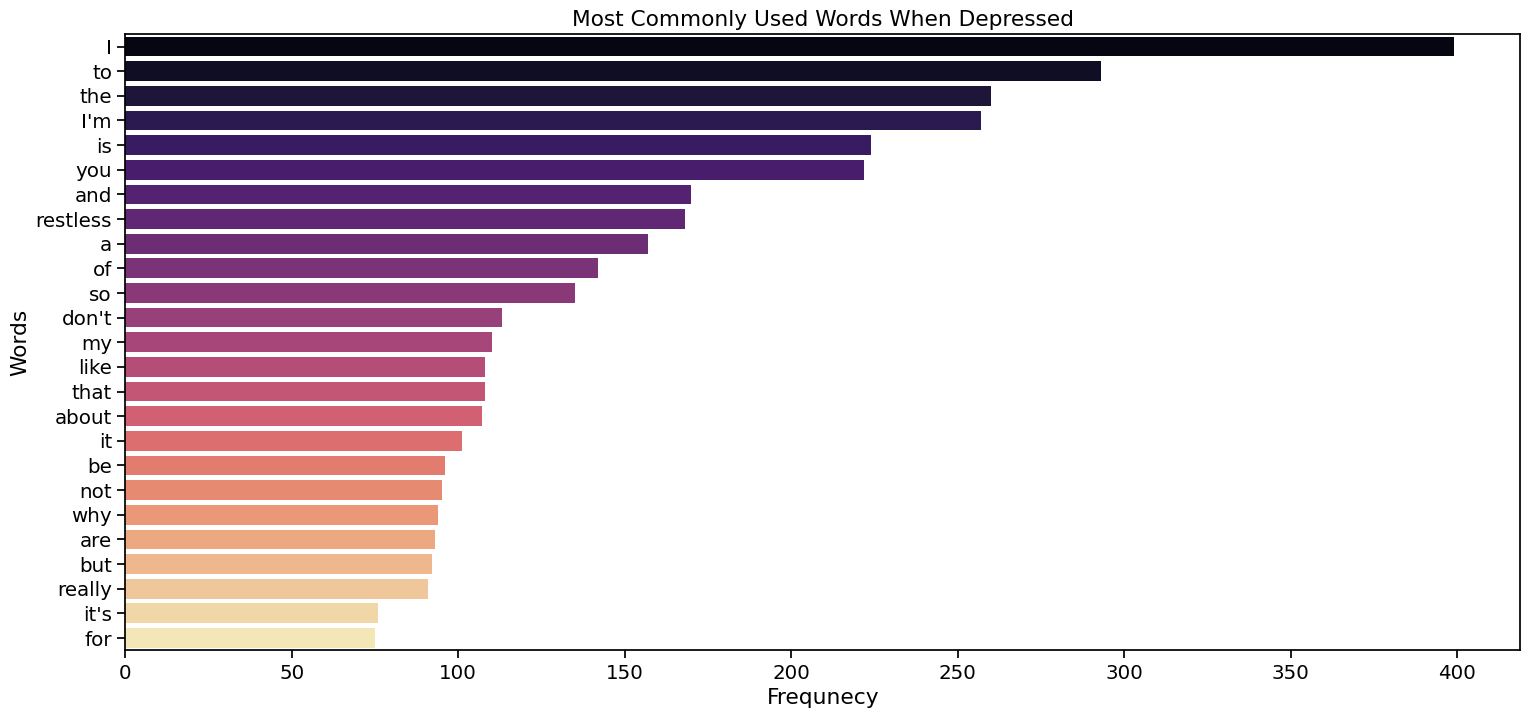

In [39]:
all_dep_words = []
for sentence in df[df['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

dl = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = dl['Word'], x= dl['Frequency'], palette= 'magma')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [40]:
df.tail().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,text,label,Age,Gender,Age Group,cleaned
6949,sleep really restless duh don't like it,1.000000,13,Male,Young Teens,sleep really restless duh do not like it
5514,861b2d82-018e-4452-bdb5-fbab46b38feb,0.000000,16,Male,Teen Age,b d e bdb fbab b feb
3822,AAAAA GAMAU SHOWING HIKS,0.000000,14,Male,Young Teens,aaaaa gamau showing hiks
4907,"If you read that people have experience at AZ Vacc Centers, it's so fast! Best. My experience both times at HKL is quite slow. He told me to come at 8am, at 10, just call him. In between, he had to change seats many times, he shared the number many times... haha ​​but never mind all is done and well",0.000000,17,Male,Teen Age,if you read that people have experience at az vacc centers it is so fast best my experience both times at hkl is quite slow he told me to come at am at just call him in between he had to change seats many times he shared the number many times haha but never mind all is done and well
3084,/beauty/ does anyone use nvtrishe serum or not?? Review dong,0.000000,15,Male,Teen Age,beauty does anyone use nvtrishe serum or not review dong


<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">MACHINE LEARNING MODEL</p>

## Feature Extraction with CountVectorizer

In [41]:
X = df.cleaned
y = df.label

In [42]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [43]:
X_cv =vect.fit_transform(X).toarray()

In [44]:
X_cv.shape

(6970, 20000)

In [45]:
df.cleaned

1149         guys can you check my pin                   
5947                             only two days of fasting
4037                                           lazy to go
1208    good leader showing the good behavior  now i s...
1198                             break or not  edi break 
                              ...                        
6949             sleep really restless duh do not like it
5514                    b d      e      bdb  fbab  b  feb
3822                             aaaaa gamau showing hiks
4907    if you read that people have experience at az ...
3084     beauty  does anyone use nvtrishe serum or not...
Name: cleaned, Length: 6970, dtype: object

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [48]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Logistic Regression</p>

Accuracy : 0.9842180774748924

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.98      0.87      0.92       146

    accuracy                           0.98      1394
   macro avg       0.98      0.93      0.96      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


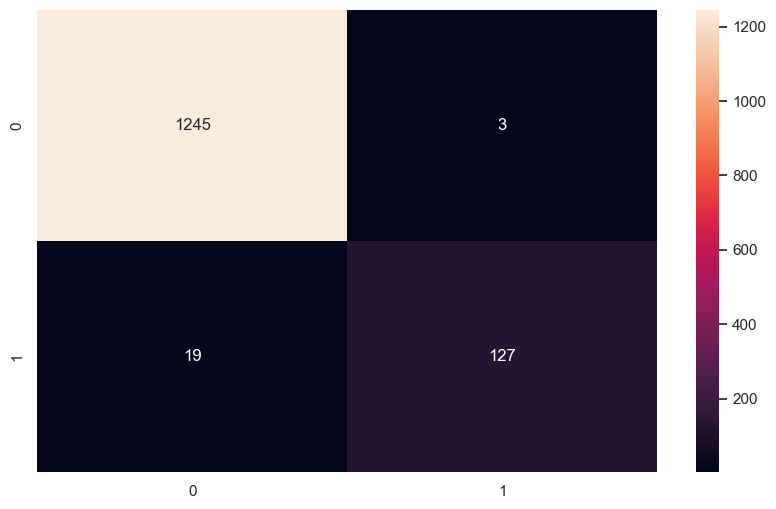

In [49]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Naive Bayes</p>

Accuracy : 0.9404591104734576

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1248
         1.0       0.67      0.85      0.75       146

    accuracy                           0.94      1394
   macro avg       0.83      0.90      0.86      1394
weighted avg       0.95      0.94      0.94      1394

   ------------ Confusion Matrix -------------- 


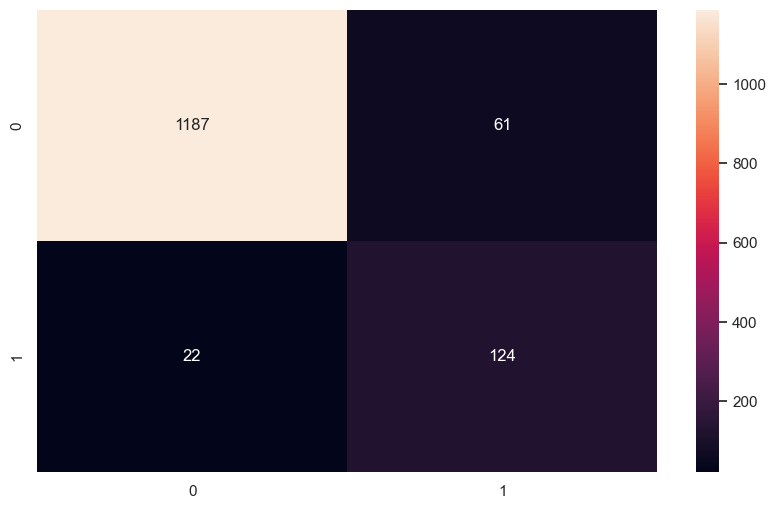

In [50]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Decision Tree</p>

Accuracy : 0.9827833572453372

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1248
         1.0       0.89      0.95      0.92       146

    accuracy                           0.98      1394
   macro avg       0.94      0.97      0.96      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


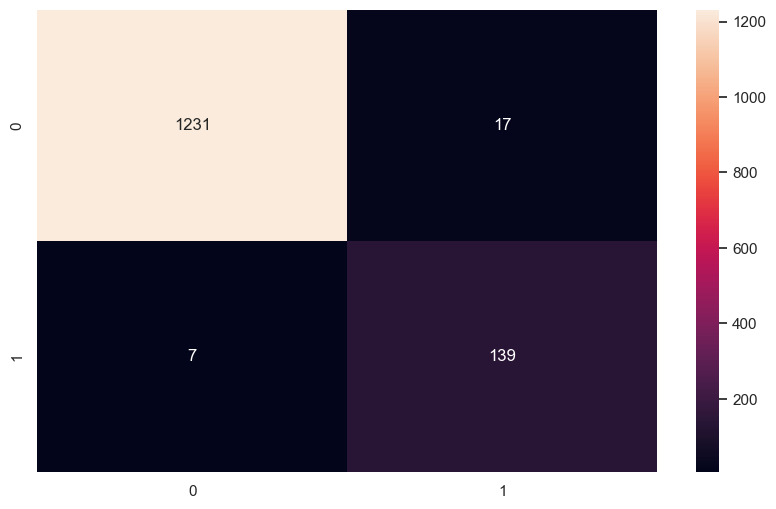

In [51]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Support Vector Machine</p>

Accuracy : 0.960545193687231

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1248
         1.0       1.00      0.62      0.77       146

    accuracy                           0.96      1394
   macro avg       0.98      0.81      0.87      1394
weighted avg       0.96      0.96      0.96      1394

   ------------ Confusion Matrix -------------- 


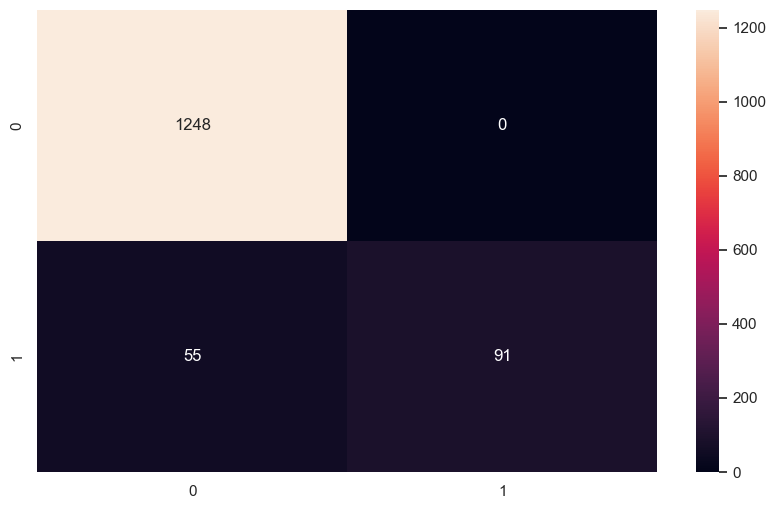

In [52]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">AdaBoost </p>

Accuracy : 0.9856527977044476

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1248
         1.0       0.95      0.91      0.93       146

    accuracy                           0.99      1394
   macro avg       0.97      0.95      0.96      1394
weighted avg       0.99      0.99      0.99      1394

   ------------ Confusion Matrix -------------- 


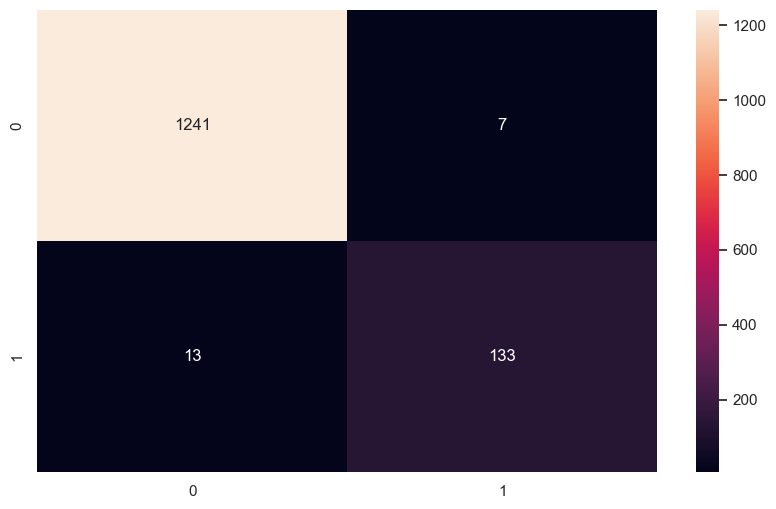

In [53]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">KNN</p>

C:\Users\shish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy : 0.9146341463414634

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1248
         1.0       0.94      0.20      0.33       146

    accuracy                           0.91      1394
   macro avg       0.92      0.60      0.64      1394
weighted avg       0.92      0.91      0.89      1394

   ------------ Confusion Matrix -------------- 


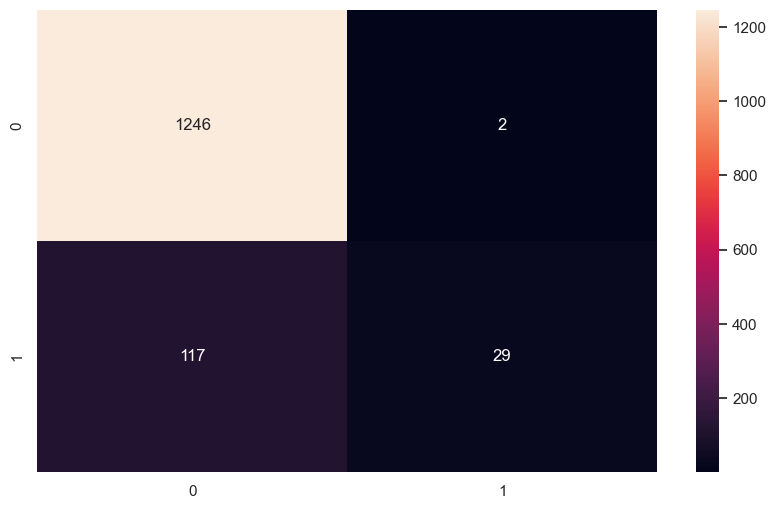

In [54]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Random Forest</p>

Accuracy : 0.9799139167862266

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1248
         1.0       0.95      0.86      0.90       146

    accuracy                           0.98      1394
   macro avg       0.97      0.93      0.94      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


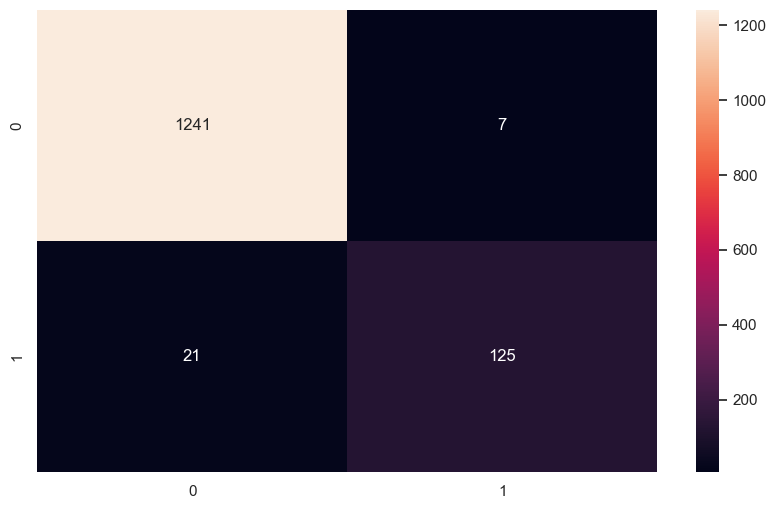

In [55]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

C:\Users\shish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy : 0.9835007173601148

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.98      0.86      0.92       146

    accuracy                           0.98      1394
   macro avg       0.98      0.93      0.95      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


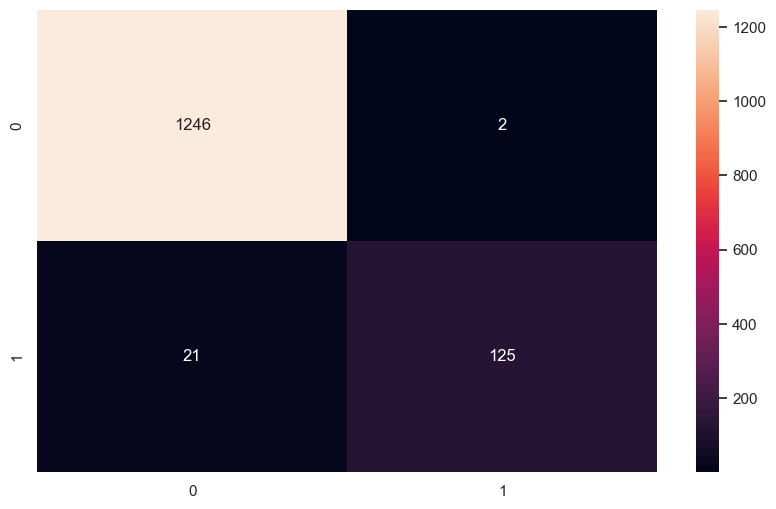

In [56]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('AdaBoost',clf_adb),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

In [57]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">RESULT EVALUATION</p>

In [58]:
text = "I am / exhauted :) and restless."

In [59]:
clean_text = text_cleaner(text)

C:\Users\shish\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [60]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

C:\Users\shish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [61]:
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

Anxiety/Depression
